In [1]:
!pip install skope-rules
!pip install eli5
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 14.6 MB/s 
     |████████████████████████████████| 133 kB 73.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=72facc7310e671ff7aeb7bb5addbaa23391cd94756ab2dee70056e682f527910
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which

In [2]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [29]:
# import pandas for data wrangling
import pandas as pd
# import numpy for vectorize data manipulation
import numpy as np
# import matplotlib.pyplot module for data visualization
import matplotlib.pyplot as plt

# import train and test split method from scikit-learn
from sklearn.model_selection import train_test_split
# import metrics method for model evaluation
import sklearn.metrics as metrics
# load linear regression model
from sklearn.linear_model import LinearRegression

# load statsmodel module 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# load scikit-plot modules
import scikitplot as skplt

In [4]:
df = pd.read_csv('world_happiness_report.csv')

In [5]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
df = df.drop(['Overall rank', 'Country or region'], axis = 1)


In [7]:
df.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
df.corr()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Score,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [9]:
# train-test split
y = df['Score'].values
X = df.drop(['Score'], axis = 1).values

In [10]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.3,
    random_state = 1000
)

In [11]:
# check X_train_sales dimension
X_train.shape

(109, 6)

In [12]:
# check X_test_sales dimension
X_test.shape



(47, 6)

In [13]:



# Check y_test_sales dimension
y_test.shape

(47,)

In [14]:

y_train.shape

(109,)

In [15]:
# define model
X_train_int = sm.add_constant(X_train)
# fit regression model to data
linear_reg_sm = sm.OLS(y_train, X_train_int).fit()

In [ ]:
X_train_int

In [18]:
# check model summary
linear_reg_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     70.13
Date:                Mon, 11 Jul 2022   Prob (F-statistic):           5.75e-34
Time:                        02:39:56   Log-Likelihood:                -76.274
No. Observations:                 109   AIC:                             166.5
Df Residuals:                     102   BIC:                             185.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8043      0.245      7.354      0.000       1.318       2.291
x1             0.7885      0.240      3.285      0.001       0.312       1.265
x2             1.3288      0.270      4.925      0.000       0.794       1.864
x3             0.9086      0.382      2.379      0.019       0.151       1.666
x4             1.3263      0.417      3.183      0.002       0.500       2.153
x5             0.2921      0.598      0.488      0.626      -0.895       1.479
x6             1.0821      0.592      1.829      0.070      -0.091       2.255
==============================================================================
Omnibus:                        3.452   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                2.836
Skew:                          -0.360   Prob(JB):                        0.242
Kurtosis:                       3.327   Cond. No.                         29.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# check model weights
linear_reg_sm.params


array([1.80427188, 0.7885165 , 1.3287838 , 0.90861855, 1.32632259,
       0.29213023, 1.08206686])

In [20]:
X_test_int = sm.add_constant(X_test)

In [ ]:
X_test_int

In [22]:
# predict
pred_result = linear_reg_sm.predict(X_test_int)


In [30]:
# evaluation using Mean Squared Error
metrics.mean_squared_error(y_test, pred_result)

0.3759556742843574

In [31]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result) * 100

10.258094147614006

In [25]:
# define linear regression model
linear_reg_scikit = LinearRegression(fit_intercept = True)
# fit model to data
linear_reg_scikit.fit(X_train, y_train)

LinearRegression()

In [26]:
# check model coefficient
linear_reg_scikit.coef_

array([0.7885165 , 1.3287838 , 0.90861855, 1.32632259, 0.29213023,
       1.08206686])

In [27]:
# create prediction
pred_result = linear_reg_scikit.predict(X_test)

In [32]:
# evaluation using Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, pred_result))

0.6131522439691119

In [33]:
# evaluation using Mean Absolute Percentage Error
metrics.mean_absolute_percentage_error(y_test, pred_result)

0.10258094147614007

In [34]:
# check R-squared
linear_reg_scikit.score(X_train, y_train)

0.8048839227415107

In [35]:
## create function to estimate r2 for each variables
def r2_est(X,y):
    return metrics.r2_score(y,LinearRegression().fit(X,y).predict(X))

In [36]:
# check if function already functional (pun intended :p)
r2_est(X_train, y_train)

0.8048839227415107

In [37]:
# save column name to var_name variables
var_name = df.drop(['Score'], axis = 1).columns

In [38]:
var_name

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [39]:
# feature importance calculation
r2_impact = list()
for j in range(X_train.shape[1]):
  selection = [i for i in range(X_train.shape[1]) if i!=j]
  r2_impact.append(((r2_est(X_train,y_train) - r2_est(X_train[:,selection],y_train)) ,var_name[j]))

In [40]:
# check variable importance
r2_impact

[(0.020639478001813094, 'GDP per capita'),
 (0.04639519931650049, 'Social support'),
 (0.010825180898697995, 'Healthy life expectancy'),
 (0.01938241774681848, 'Freedom to make life choices'),
 (0.00045589379535371233, 'Generosity'),
 (0.0064001060021479095, 'Perceptions of corruption')]

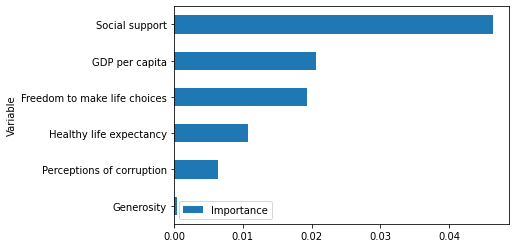

In [41]:
# visualize feature importance
pd.DataFrame(r2_impact, columns=['Importance', 'Variable']). \
sort_values(by='Importance'). \
plot(x = 'Variable', y = 'Importance', kind = 'barh')

Summary : From data above, we know that Social support has the biggest effect on a person's happiness, followed by GDP per capita, Freedom to make life choices and others. Statsmodel shows many statistic data related the model that needed; from code  "linear_reg_sm.summary()" we know that x5 and x6 has P value more than 0,05 it means that those two variable not significantly affected the model. In the other way, the model has error until 10,25% from mean absolute percentage error, so the model need to be improved 